# AirBnB Exploratory Data Analysis

## dependencies

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# dataset ingestion and quick check anc cleaning

In [4]:
data = pd.read_csv("dataset/airbnb.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [5]:
data.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license',
 'rating',
 'bedrooms',
 'beds',
 'baths']

In [6]:
data.shape

(20770, 22)

In [7]:
# checking for null
data.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [9]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In [10]:
# checking for duplicates
data.duplicated().sum()

np.int64(12)

In [12]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [13]:
data["license"].value_counts()

license
No License            17579
Exempt                 2137
OSE-STRREG-0000068       14
OSE-STRREG-0000437        6
OSE-STRREG-0008664        6
                      ...  
OSE-STRREG-0000999        1
OSE-STRREG-0000199        1
OSE-STRREG-0000447        1
OSE-STRREG-0000780        1
OSE-STRREG-0000334        1
Name: count, Length: 879, dtype: int64

In [14]:
data["room_type"].value_counts()

room_type
Entire home/apt    11555
Private room        8803
Shared room          293
Hotel room           112
Name: count, dtype: int64

In [15]:
data.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license',
 'rating',
 'bedrooms',
 'beds',
 'baths']

In [16]:
data["availability_365"].value_counts()

availability_365
365.0    2681
0.0      2481
364.0    1273
180.0     505
90.0      489
         ... 
12.0       10
192.0       9
103.0       8
193.0       5
196.0       5
Name: count, Length: 366, dtype: int64

In [17]:
data["beds"].value_counts()

beds
1     12316
2      4840
3      2029
4       929
5       335
6       162
7        63
8        49
9        22
10       11
12        5
11        4
21        1
14        1
13        1
18        1
42        1
Name: count, dtype: int64

In [18]:
data["baths"].value_counts()

baths
1                17026
2                 2083
1.5               1001
2.5                240
3                  171
0                   82
4                   69
3.5                 50
4.5                 18
Not specified       13
5                    6
6                    4
5.5                  2
6.5                  2
11.5                 1
7                    1
15.5                 1
Name: count, dtype: int64

In [19]:
# dropping nulls
data = data.dropna()

In [20]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [21]:
data.shape

(20736, 22)

In [22]:
# dropping duplicates
data = data.drop_duplicates()


In [23]:
data.duplicated().sum()

np.int64(0)

In [24]:
data.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [25]:
data["id"] = data["id"].astype(object)

In [26]:
data.dtypes

id                                 object
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [27]:
data["host_id"] = data["host_id"].astype(object)
data.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

## data analysis: univariate analysis

<Axes: xlabel='price'>

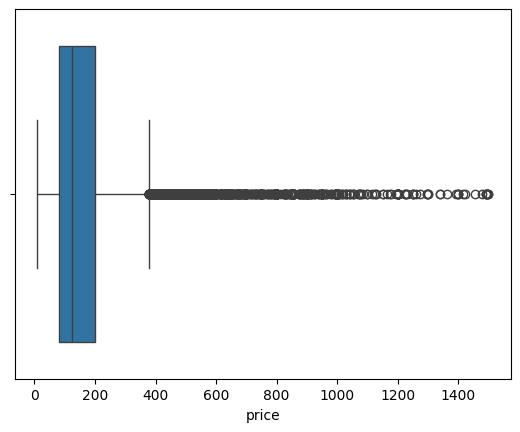

In [33]:
# price outliers with boxplots
df = data[data["price"] < 1500]
sns.boxplot(
    data = df,
    x = "price"
)

Text(0, 0.5, 'frequency')

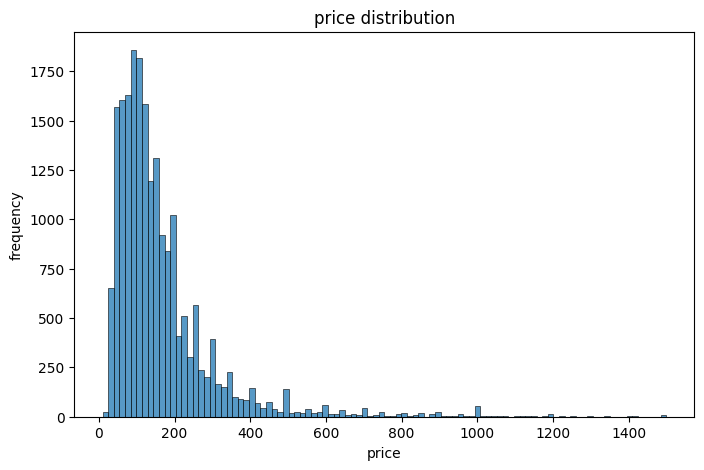

In [38]:
# prece distriution
plt.figure(figsize=(8, 5))
sns.histplot(
    data = df,
    x = "price",
    bins = 100
)
plt.title("price distribution")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

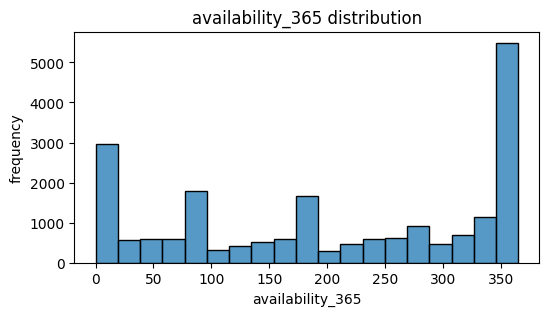

In [40]:
# availability_365 distriution
plt.figure(figsize=(6, 3))
sns.histplot(
    data = df,
    x = "availability_365"
)
plt.title("availability_365 distribution")
plt.ylabel("frequency")

In [41]:
df.groupby(
    by = "neighbourhood_group"
)["price"].mean()

neighbourhood_group
Bronx            107.990506
Brooklyn         155.138317
Manhattan        204.146014
Queens           121.681939
Staten Island    118.780069
Name: price, dtype: float64

In [47]:
# price per bed
df["price per bed"] = df["price"] / df["beds"]
df.head()

/tmp/ipykernel_19745/3200060700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price per bed"] = df["price"] / df["beds"]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price per bed,price per bed
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,1.0,0.0,0.0,No License,5,1,1,Not specified,55.0,55.0
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,139.0,364.0,2.0,No License,4.67,2,1,1,144.0,144.0
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.0,343.0,6.0,Exempt,4.17,1,2,1,93.5,93.5
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2.0,363.0,12.0,No License,4.64,1,1,1,120.0,120.0
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,133.0,335.0,3.0,No License,4.91,Studio,1,1,85.0,85.0


In [48]:
df.groupby(
    by = "neighbourhood_group"
)["price per bed"].mean()

neighbourhood_group
Bronx             74.713639
Brooklyn          99.788493
Manhattan        138.708057
Queens            76.336210
Staten Island     67.728101
Name: price per bed, dtype: float64

In [46]:
df.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license',
 'rating',
 'bedrooms',
 'beds',
 'baths',
 'price per bed ']

<Axes: xlabel='neighbourhood_group', ylabel='price'>

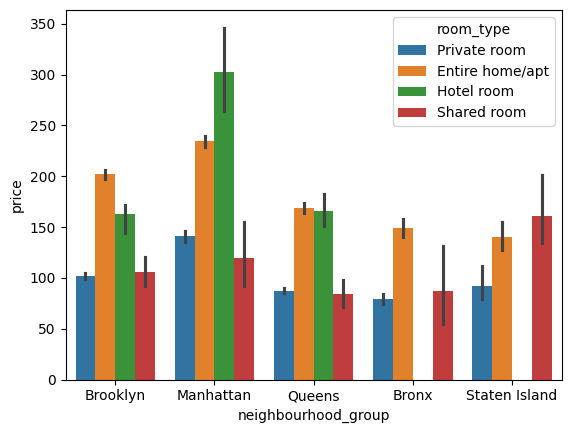

In [ ]:
# price dependencies on neighbourhood
sns.barplot(
    data = df,
    x = "neighbourhood_group",
    y = "price",
    hue = "room_type"
)

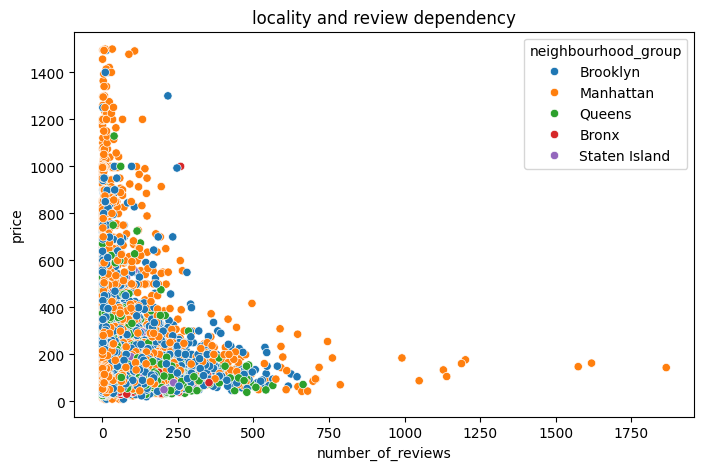

In [54]:
# number of reviews and price relationship
plt.figure(figsize=(8, 5))
plt.title("locality and review dependency")
sns.scatterplot(
    data = df,
    x = "number_of_reviews",
    y = "price",
    hue = "neighbourhood_group"
)
plt.show()

In [55]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
price per bed                     float64
price per bed                     

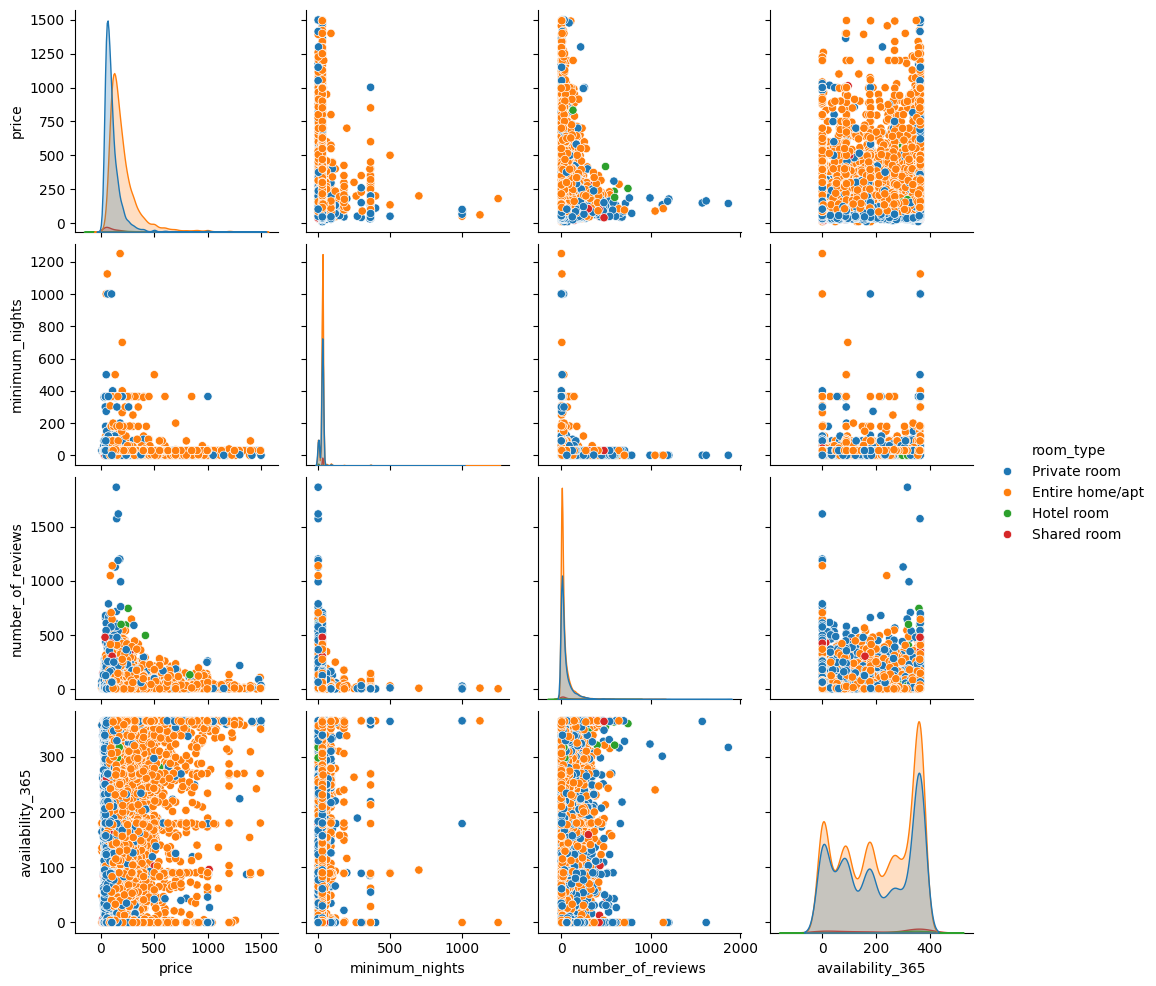

In [56]:
sns.pairplot(
    data = df,
    vars = ["price", "minimum_nights", "number_of_reviews", "availability_365"],
    hue = "room_type"
)

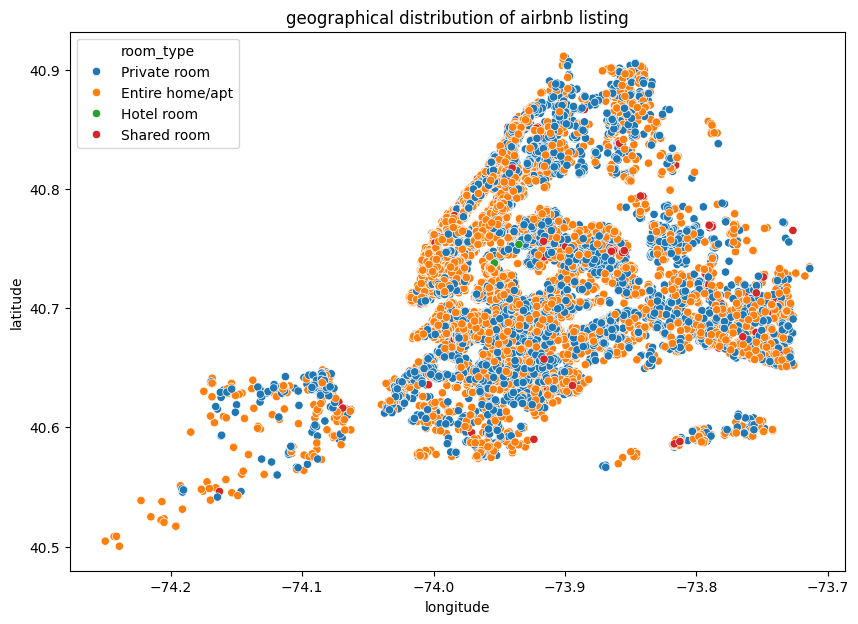

In [60]:
# geographical distribution
plt.figure(figsize=(10, 7))

sns.scatterplot(
    data = df,
    x = "longitude",
    y = "latitude",
    hue = "room_type"
)
plt.title("geographical distribution of airbnb listing")
plt.show()

In [61]:
# correlations
num_df = df.select_dtypes(include='number')
corr = num_df.corr()
corr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds,price per bed,price per bed
latitude,1.000000,0.047369,0.012686,0.004590,-0.047953,-0.041673,0.070134,-0.005941,-0.041558,-0.071753,0.055458,0.055458
longitude,0.047369,1.000000,-0.193728,0.023890,0.004820,0.041720,-0.072873,0.063523,0.033048,0.041832,-0.233879,-0.233879
price,0.012686,-0.193728,1.000000,-0.044635,-0.043533,-0.012775,-0.016238,0.048036,-0.029930,0.415278,0.687335,0.687335
minimum_nights,0.004590,0.023890,-0.044635,1.000000,-0.059049,-0.122509,0.014990,0.035466,-0.092610,-0.025852,-0.030475,-0.030475
number_of_reviews,-0.047953,0.004820,-0.043533,-0.059049,1.000000,0.631005,-0.114973,-0.049656,0.606292,0.040071,-0.064332,-0.064332
reviews_per_month,-0.041673,0.041720,-0.012775,-0.122509,0.631005,1.000000,-0.109052,-0.040116,0.850101,0.053496,-0.047001,-0.047001
calculated_host_listings_count,0.070134,-0.072873,-0.016238,0.014990,-0.114973,-0.109052,1.000000,0.046833,-0.092063,-0.072561,0.031054,0.031054
availability_365,-0.005941,0.063523,0.048036,0.035466,-0.049656,-0.040116,0.046833,1.000000,-0.048794,0.065985,0.003632,0.003632
number_of_reviews_ltm,-0.041558,0.033048,-0.029930,-0.092610,0.606292,0.850101,-0.092063,-0.048794,1.000000,0.036614,-0.054380,-0.054380
beds,-0.071753,0.041832,0.415278,-0.025852,0.040071,0.053496,-0.072561,0.065985,0.036614,1.000000,-0.201893,-0.201893


<Axes: >

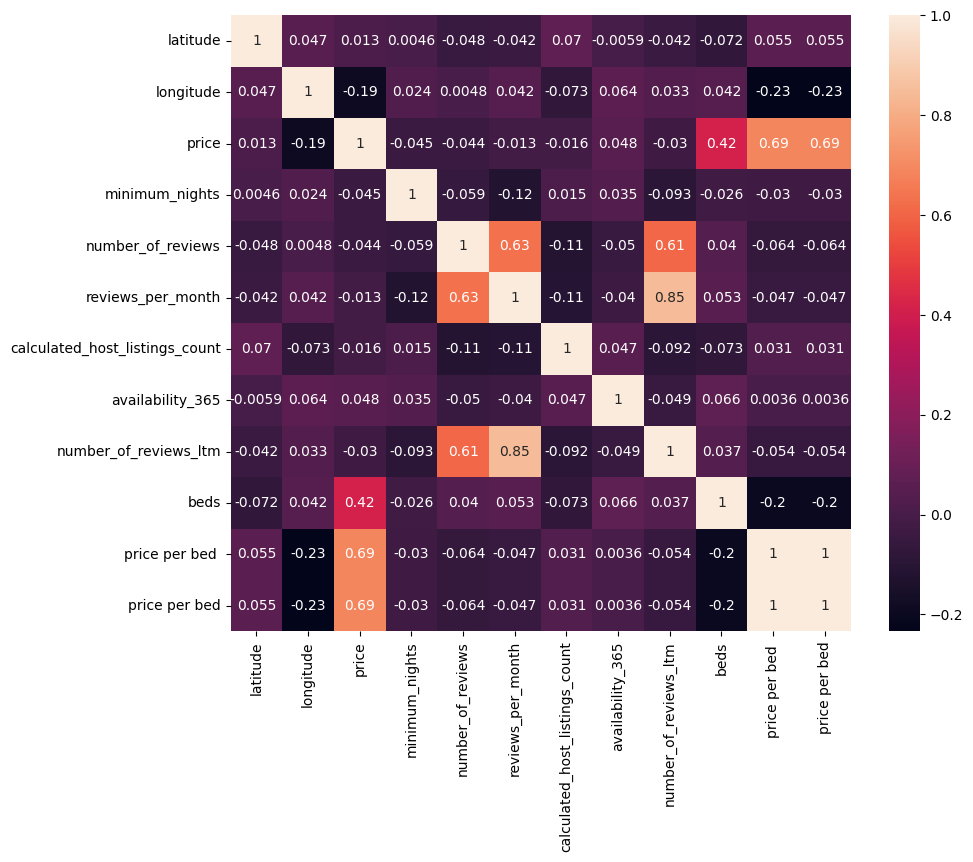

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    data = corr,
    annot = True
)